# Importando libs

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Lendo arquivos

In [7]:
turbina = pd.read_csv('T1.csv')
# renomeando colunas
turbina.columns = ['Data/Hora', 'ActivePower(kw)', 'WindSpeed(m/s)', 'CurvaTeorica(kmh)', 'DirecaoVento']
# retirando direção vento por ser desnecessário nessa analise
del turbina['DirecaoVento']
turbina['Data/Hora'] = pd.to_datetime(turbina['Data/Hora'])
display(turbina)

,Data/Hora,ActivePower(kw),WindSpeed(m/s),CurvaTeorica(kmh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


# Plotando dados em um gráfico - Real

<AxesSubplot:xlabel='WindSpeed(m/s)', ylabel='ActivePower(kw)'>

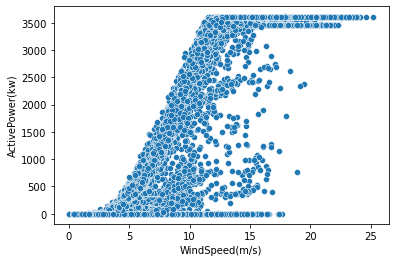

In [8]:
sns.scatterplot(data=turbina, x= 'WindSpeed(m/s)', y='ActivePower(kw)')

# Plotando dados em um gráfico - Teorica

<AxesSubplot:xlabel='WindSpeed(m/s)', ylabel='CurvaTeorica(kmh)'>

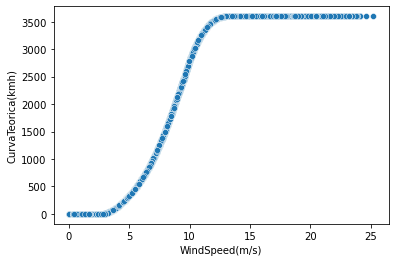

In [9]:
sns.scatterplot(data=turbina, x= 'WindSpeed(m/s)', y='CurvaTeorica(kmh)')

# Criando "limites aceitáveis"

In [13]:
pot_real = turbina['ActivePower(kw)'].tolist()
pot_teorica = turbina['CurvaTeorica(kmh)'].tolist()
pot_max = []
pot_min = []
dentro_limite = []
for potencia in pot_teorica:
    pot_max.append(potencia * 1.05)
    pot_min.append(potencia * 0.95)

for indice, potencia in enumerate(pot_real):
    if potencia >= pot_min[indice] and potencia <= pot_max[indice]:
        dentro_limite.append('Dentro')
    elif potencia == 0:
        dentro_limite.append('Zero')
    else:
        dentro_limite.append('Fora')
print(dentro_limite.count('Dentro')/len(dentro_limite))

0.37286760340391845


# Adicionando lista "dentro_limite" ao dataframe

In [14]:
turbina['DentroLimite'] = dentro_limite
display(turbina)

,Data/Hora,ActivePower(kw),WindSpeed(m/s),CurvaTeorica(kmh),DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


# Plotando grafico

<AxesSubplot:xlabel='WindSpeed(m/s)', ylabel='ActivePower(kw)'>

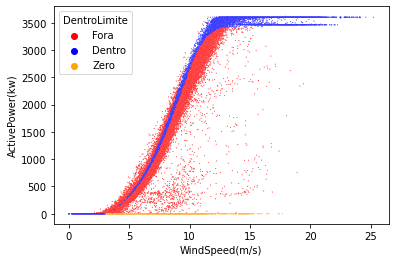

In [19]:
cores = {'Dentro': 'blue', 'Fora': 'red', 'Zero': 'orange'}
sns.scatterplot(data=turbina, x= 'WindSpeed(m/s)', y='ActivePower(kw)', hue='DentroLimite', s=1, palette=cores)